## 학습 목표

- 멀티태스킹, 병렬프로그래밍과 동시성에 대해 이해합니다.
- 파이썬으로 멀티스레드와 멀티프로세스를 구현하는 법에 대해 학습합니다.
- 파이썬의 concurrent.futures를 이용한 병렬 프로그래밍을 구현해 봅니다.

#### 유의사항
이번 노드는 파이썬 3.7.9 버전을 기준으로 작성되었음을 유의해 주십시오. 파이썬 3.8 이후에는 멀티스레드 활용 등에 이 노드에서 소개하는 것과 달라진 부분이 있을 수 있습니다.



## 멀티태스킹 (1) 멀티태스킹이란?

빅데이터를 다루기 위해서는 몇 가지 중요한 개념들을 알아야 합니다. 컴퓨팅 자원을 최적화하는 방법, 즉 병렬 컴퓨팅, 분산 컴퓨팅 등의 개념입니다. 어떻게 컴퓨팅 파워를 향상시킬 수 있을까요? 어떻게 한정된 컴퓨팅 자원을 활용하여 여러 가지 일을 효율적으로 진행할 수 있을까요?

### 동시성, 병렬성

멀티태스킹에는 2가지 동작 방식이 있는데요, 바로 동시성과 병렬성입니다

-----

#### 동시성(Concurrency)

하나의 processor가 여러 가지 task를 동시에 수행하는 개념을 동시성이라고 합니다. 실제로는 그 processor는 특정 순간에는 1가지 task만을 수행하겠지만, 물을 끓이는 것처럼 다른 task를 수행할 수 있는 시간에는 task를 전환해서 효율적으로 여러 개의 task를 동시에 수행하는 것처럼 보이는 것이죠.



#### 병렬성(Parallelism)

주방장을 한 명 더 고용하면 어떨까요? 주방장을 한 명 더 고용한다면 최소한 라면 나오는 속도는 지금의 2배가 되겠죠.

라면을 끓이는 것처럼 유사한 task를 여러 processor가 동시에 수행하는 것을 **병렬성**이라고 합니다. processor의 개수만큼 퍼포먼스가 좋아지겠죠?

> CPU가 점차 발전되면서 최근에는 병렬성의 의미가 점차 확장되고 있습니다. 확장된 병렬성에 대한 더 자세한 설명은 아래의 링크를 참고하세요.  
> - http://tutorials.jenkov.com/java-concurrency/concurrency-vs-parallelism.html

동시성을 적용하여 매출이 올라 신이 난 김 사장님은 주방장을 1명 더 고용하면서 아래와 같이 생각해 보았습니다.

> ❝동시성과 병렬성을 동시에 적용하면 어떻게 될까?❞

그랬더니 놀라운 일이 일어났습니다. 라면 1개를 끓이는데 10분보다 훨씬 짧은 시간이 소요될 수도 있다는 것을 알게 되었습니다. 주방장 한 명이 물을 끓이는 동안, 다른 주방장이 그 라면의 재료를 미리 손질해 두는 식으로 하였더니 라면 1개를 끓이는데 소요되는 시간이 더 줄어들면서 훨씬 많은 라면을 끓여낼 수 있게 된 것이죠.

**이렇듯, 병렬성의 효율을 극대화하는 것은 동시성이 요구될 때입니다**. 이때, 여러 개의 프로세스가 1개의 task를 여러 개의 subtask로 쪼개어 동시에 병렬적으로 수행할 수 있기 때문입니다.


### 동기 vs 비동기 (Synchronous vs Asynchronous)

동기와 비동기는 동시성에서 주로 다루게 되는 개념입니다. 어떤 일을 바로 하지 못하고 대기해야 하는 일을 일컬을 때 컴퓨터에서는 "바운드(bound) 되었다"라는 표현을 많이 씁니다. 어떤 일이 바운드되고 있으면 이걸 계속 기다려야 할지, 아니면 종료되는 사이에 다른 걸 실행하는 것이 좋을지 고민이 되지요.

이 개념을 일반화시켜 이야기하면, 앞 작업이 종료되기를 무조건 기다렸다가 다음 작업을 수행하는 것은 동기(synchronized) 방식이라고 합니다. 반대로 바운드되고 있는 작업을 기다리는 동안 다른 일을 처리하는 것을 비동기(asynchronous) 방식이라고 합니다.

- 동기(Synchronous) : 어떤 일이 순차적으로 실행됨. 요청과 요청에 대한 응답이 연속적으로 실행됨 (따라서 요청에 지연이 발생하더라도 계속 대기한다.)
- 비동기(Asynchronous) : 어떤 일이 비순차적으로 실행됨. 요청과 요청에 대한 응답이 연속적으로 실행되지 않음. 특정 코드의 연산이 끝날 때까지 코드의 실행을 멈추지 않고 다음 코드를 먼저 실행하며, 중간에 실행되는 코드는 주로 콜백함수로 연결하기도 한다.

### I/O Bound vs CPU Bound

컴퓨터가 일을 수행하면서 뭔가 기다릴 때, 즉 속도에 제한이 걸릴 때는 2가지 상황에 해당하는 경우가 대부분입니다.

- I/O 바운드: 입력과 출력에서의 데이터(파일)처리에 시간이 소요될 때.
- CPU 바운드: 복잡한 수식 계산이나 그래픽 작업과 같은 엄청난 계산이 필요할 때.

바운드에 대해 더 자세히 알고 싶다면 아랫글을 참고하시면 됩니다.

https://stackoverflow.com/questions/868568/what-do-the-terms-cpu-bound-and-i-o-bound-mean

## 멀티태스킹 (2) 프로세스, 스레드, 프로파일링

우리는 컴퓨터를 사용해 PPT 문서 작업을 하면서, 노래를 듣기도 하고, 웹 브라우저를 이용해 검색을 하기도 합니다. 요즘 컴퓨터에서는 이렇게 여러 개 프로그램을 동시에 실행시키는 멀티태스킹이 기본 사양입니다. 그리고 게임, 영상 통신 부분에서 멀티스레드를 사용합니다.

게임에서는 메인 스레드는 게임을 하기 위한 UI 부분을 그려줍니다. 그래픽 부분 담당 코드는 순차적으로 실행되기 때문에, UI를 그리는 서버 통신을 담당하는 소켓 부분을 방치하는 수밖에 없게 됩니다. 이를 해결하기 위해 통신을 담당하는 스레드를 따로 하나를 두어 일정한 시간 단위로 체크할 수 있도록 구현하기 위해 멀티 스레드를 사용하게 됩니다.

영상통신에서는 영상을 받아 화면에 출력해 주는 코드와 영상을 생성하여 보내주는 코드를 만드는 경우에 적어도 2개의 작업이 동시에 일어난다는 것을 알 수 있습니다. 이렇게 두 가지 이상의 일을 구현하기 위해 다중 스레드를 사용하게 됩니다.

맥(Mac)의 활성 상태 보기`(Activity Monitor)`, 윈도우(Windows)의 작업 관리자(Task Manager), 우분투(Ubuntu)의 작업 관리자(System Monitor)를 통해 현재 실행되고 있는 프로그램의 상태를 확인할 수 있습니다.

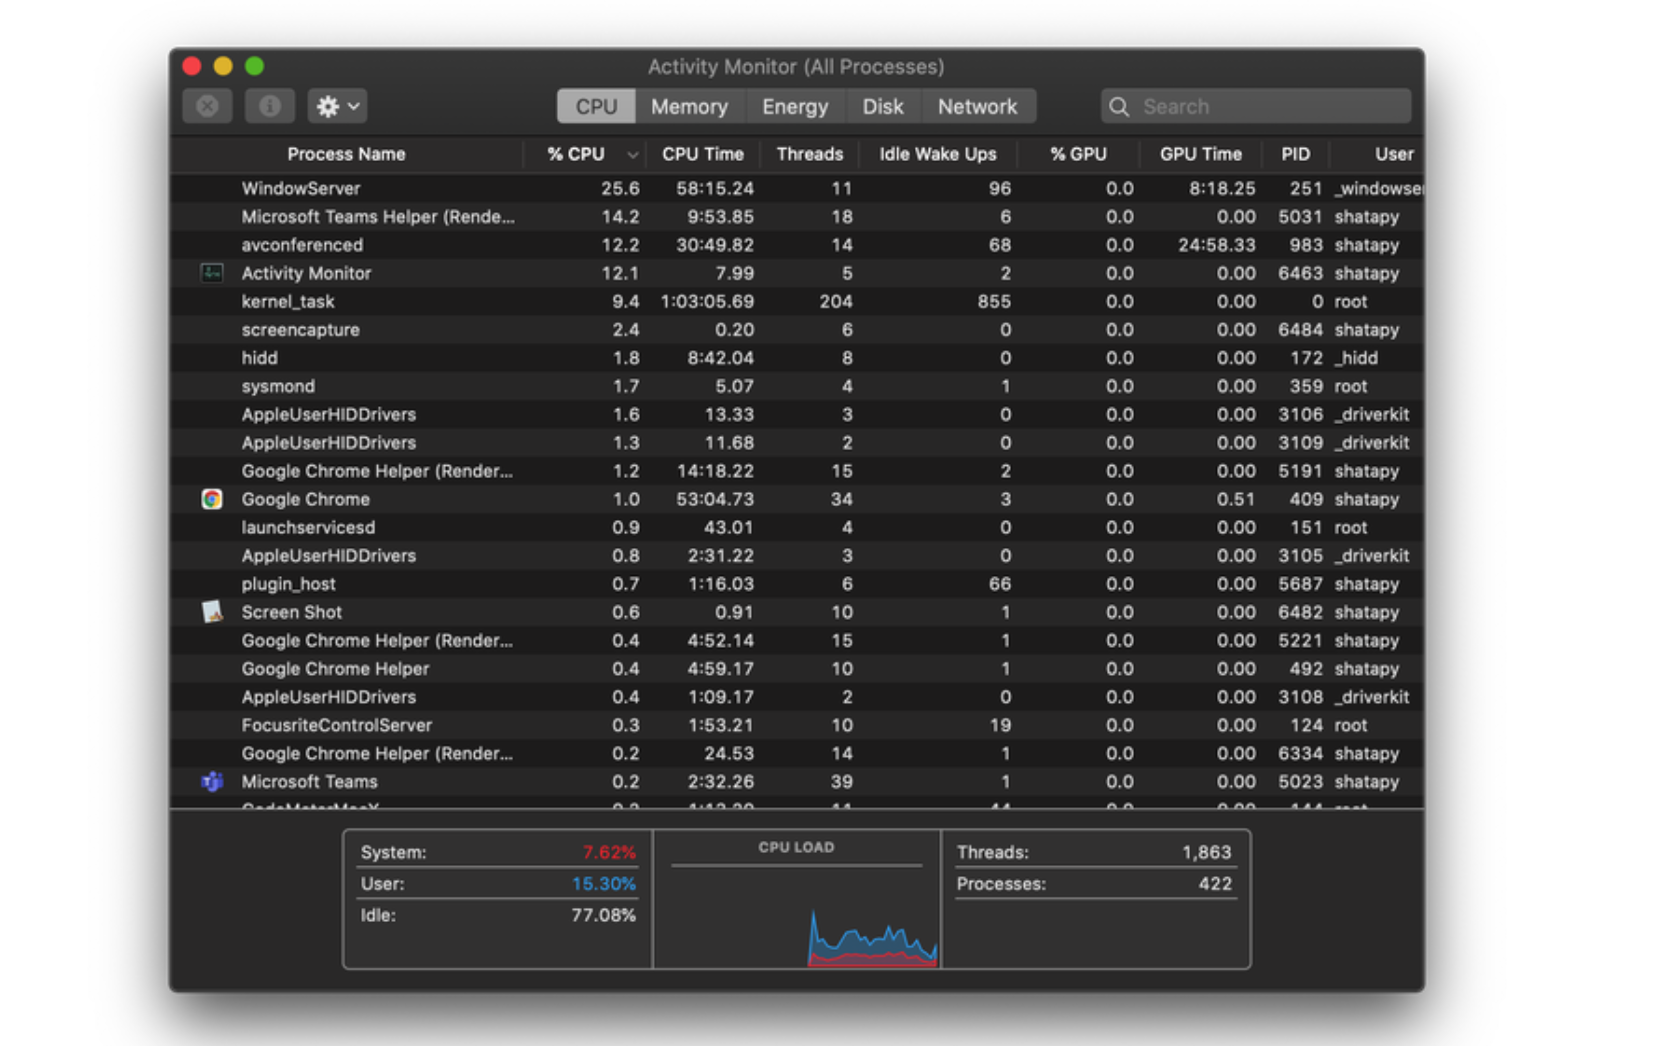

### Process(프로세스)

> Process: An Instance of a program (ex. Python Interpreter)

하나의 프로그램을 실행할 때, 운영체제는 한 프로세스를 생성합니다. 프로세스는 운영체제의 커널(Kernel)에서 시스템 자원(CPU, 메모리, 디스크) 및 자료구조를 이용합니다.

프로세스는 "프로그램을 구동하여 프로그램 자체와 프로그램의 상태가 메모리상에서 실행되는 작업 단위"를 지칭합니다 (출처: 위키백과 - 프로세스). 예를 들어, 하나의 프로그램을 한 번 구동하면 하나의 프로세스가 메모리상에서 실행되지만 여러 번 구동하면 여러 개의 프로세스가 실행됩니다.

파이썬에서는 `os` 라는 모듈에서 프로세스 관련 정보를 얻을 수 있습니다.

In [2]:
import os

# process ID
print("process ID:", os.getpid())

# user ID
print("user ID:", os.getuid())

# group ID
print("group ID:", os.getgid())

# 현재 작업중인 디렉토리
print("current Directory:", os.getcwd())

process ID: 14
user ID: 0
group ID: 0
current Directory: /aiffel/aiffel/python_basics


`os.getpid()`를 통해 얻은 pid는 어떤 프로세스의 것일까요? 터미널을 열어 다음과 같이 해당 프로세스의 상세 정보를 확인해 봅시다. 저의 경우 `pid` 값이 4352가 얻어졌습니다.

In [3]:
# !ps -ef | grep 4352    # 여러분이 위 코드에서 확인한 pid 값을 입력해 주세요.

어떻습니까? 실은 AIFFEL LMS가 연결한 jupyter 커널 프로세스였다는 것을 이미 눈치채셨나요?

(참고) 만약 `ps` 명령어나 `pid` 개념이 생소하다고 느껴지신다면 터미널로 배우는 리눅스 운영체제 노드의 10. 리눅스 기반 운영체제 (2) 프로세스 관리와 시스템 콜 스텝을 참고해 주세요.

### Thread(스레드)

프로그램 내에서도 많은 작업이 있습니다. 스레드(thread)는 어떠한 프로그램 내, 특히 프로세스 내에서 실행되는 흐름의 단위입니다.

예를 들어 요리를 만드는 '프로그램'이라고 한다면 요리를 만드는 요리사는 '프로세스'에, 밥 짓기, 재료 볶기, 끓이기 등등의 작업을 '스레드'에 비유할 수 있습니다. 같은 작업을 좀 더 빠르게 처리하기 위해 여러 개의 스레드를 생성하기도 합니다.

프로세스와 스레드의 차이가 명확하게 이해되시나요? 아래 그림을 예로 들자면, 프로세스는 김밥, 떡볶이를 만드는 각각의 요리사와 같습니다. 이들은 각자의 전용 주방 공간에서 밥 짓기, 재료 볶기, 끓이기 등등의 작업, 즉 스레드를 병렬적으로 수행합니다.

각각의 작업을 할 때 도마, 불판 등 주방 공간은 공유되지만, 요리사끼리 각자의 주방공간을 공유하지는 않습니다. 마찬가지로 프로세스도 자신만의 전용 메모리 공간(Heap)을 가집니다. 이때 해당 프로세스 내의 스레드들은 이 메모리 공간을 공유하지만 다른 프로세스와 공유하지는 않습니다.

스레드의 사용은 프로그램마다 다릅니다. 하나의 프로그램에서 여러 개의 스레드가 병렬적으로 처리되기도 하고, 가벼운 프로그램은 하나의 스레드를 가지기도 합니다.

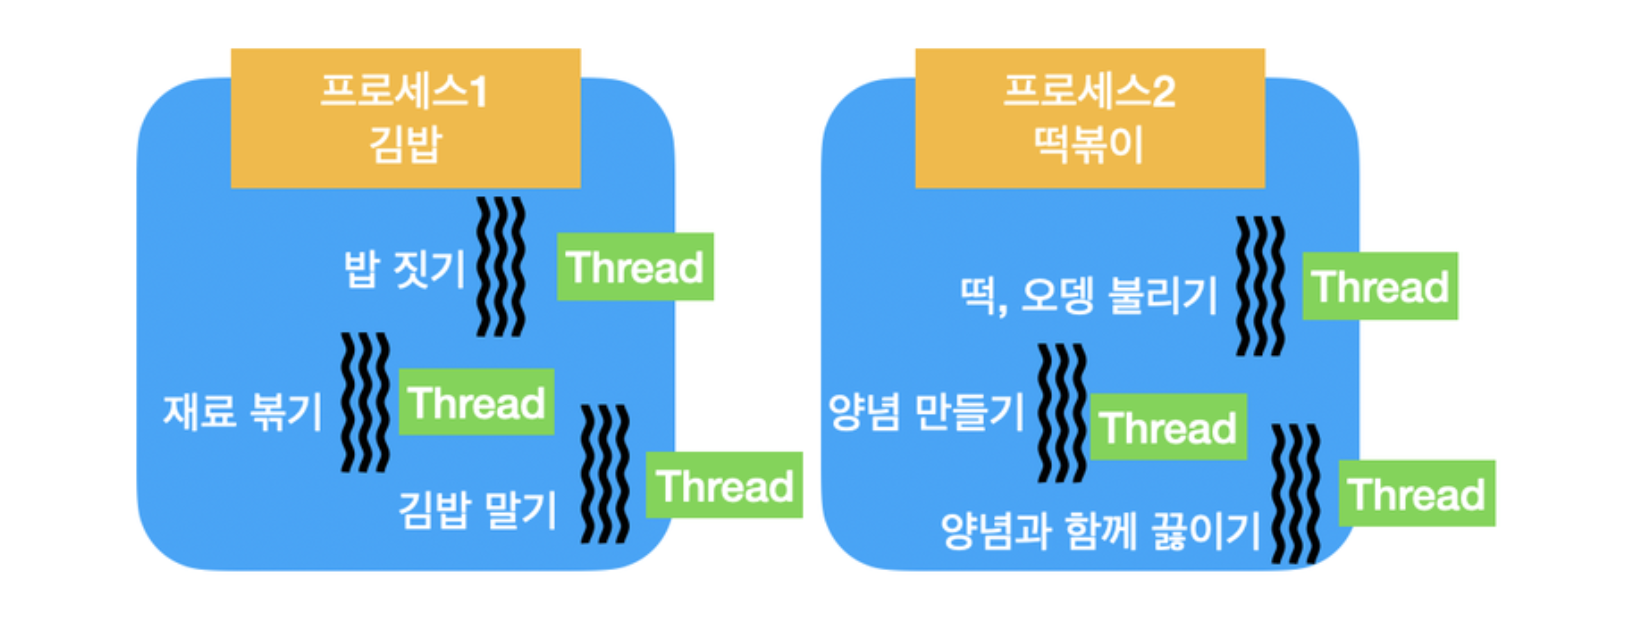

### 프로파일링(Profiling)

프로파일링이란 코드에서 시스템의 어느 부분이 느린지 혹은 어디서 RAM을 많이 사용하고 있는지를 확인하고 싶을 때 사용하는 기법입니다. 맥(mac)의 활성 상태 보기(activity monitor), 윈도우(windows)의 작업 관리자(task manager), 우분투(Ubuntu)의 작업 관리자(System Monitor)를 통해 현재 실행 중인 프로그램의 상태를 확인하는 작업을 코딩하는 것을 의미한답니다.

파이썬에서는 다음 명령어로 확인할 수 있습니다.

In [4]:
%timeit

In [5]:
import time
time.time()

1645579815.848939

In [6]:
import timeit
timeit.Timer()


간단하게 프로그램의 수행 시간을 계산해 보면서 프로파일링을 할 수 있습니다.

예제를 한번 살펴볼까요? 100까지 숫자를 배열로 만드는 방법을 각각 다른 방법으로 구현해 보고 실행 시간을 측정해 보겠습니다.

In [7]:
import timeit
        
def f1():
    s = set(range(100))

    
def f2():
    l = list(range(100))

    
def f3():
    t = tuple(range(100))


def f4():
    s = str(range(100))

    
def f5():
    s = set()
    for i in range(100):
        s.add(i)

def f6():
    l = []
    for i in range(100):
        l.append(i)
    
def f7():
    s_comp = {i for i in range(100)}

    
def f8():
    l_comp = [i for i in range(100)]
    

if __name__ == "__main__":
    t1 = timeit.Timer("f1()", "from __main__ import f1")
    t2 = timeit.Timer("f2()", "from __main__ import f2")
    t3 = timeit.Timer("f3()", "from __main__ import f3")
    t4 = timeit.Timer("f4()", "from __main__ import f4")
    t5 = timeit.Timer("f5()", "from __main__ import f5")
    t6 = timeit.Timer("f6()", "from __main__ import f6")
    t7 = timeit.Timer("f7()", "from __main__ import f7")
    t8 = timeit.Timer("f8()", "from __main__ import f8")
    print("set               :", t1.timeit(), '[ms]')
    print("list              :", t2.timeit(), '[ms]')
    print("tuple             :", t3.timeit(), '[ms]')
    print("string            :", t4.timeit(), '[ms]')
    print("set_add           :", t5.timeit(), '[ms]')
    print("list_append       :", t6.timeit(), '[ms]')
    print("set_comprehension :", t5.timeit(), '[ms]')
    print("list_comprehension:", t6.timeit(), '[ms]')

set               : 2.029739592006081 [ms]
list              : 0.9420199310116004 [ms]
tuple             : 0.8846736029954627 [ms]
string            : 0.5731136849935865 [ms]
set_add           : 6.523658322999836 [ms]
list_append       : 5.671883839997463 [ms]
set_comprehension : 6.212425431993324 [ms]
list_comprehension: 5.451110246998724 [ms]


이런 식으로 함수의 성능을 측정할 수 있습니다. 사실 이건 시간을 측정하는 방법이라서 프로파일링이라고 하기에는 좀 민망할 수도 있답니다.😅

> 좀 더 엄밀히 말하면 **프로파일링**은 애플리케이션에서 가장 자원이 집중되는 지점을 정밀하게 찾아내는 기법입니다. **프로파일러**는 애플리케이션을 실행시키고 각각의 함수 실행에 드는 시간을 찾아내는 프로그램이에요. 즉, **코드의 병목(bottleneck)** 을 찾아내고 **성능을 측정**해 주는 도구입니다.

`profile` 모듈, `cProfile`모듈과 `line_profiler` 패키지를 이용하면 높은 수준의 프로파일링이 가능합니다. 자세한 내용은 아래의 자료를 참고해 주세요.



## 멀티태스킹 (3) Scale Up vs Scale Out

프로그램과 성능에 대한 전반적인 개념에 대해 살펴보았습니다. 더 포괄적인 용어로 말하면 우리는 컴퓨터 자원을 활용하기 위해 자원을 Up(업그레이드, 최적화)시킬 수도 있고 자원을 Out(확장)시킬 수도 있습니다. Scale-Up은 한 대의 컴퓨터의 성능을 최적화시키는 방법이고 Scale-Out은 여러 대의 컴퓨터를 한 대처럼 사용하는 것입니다.

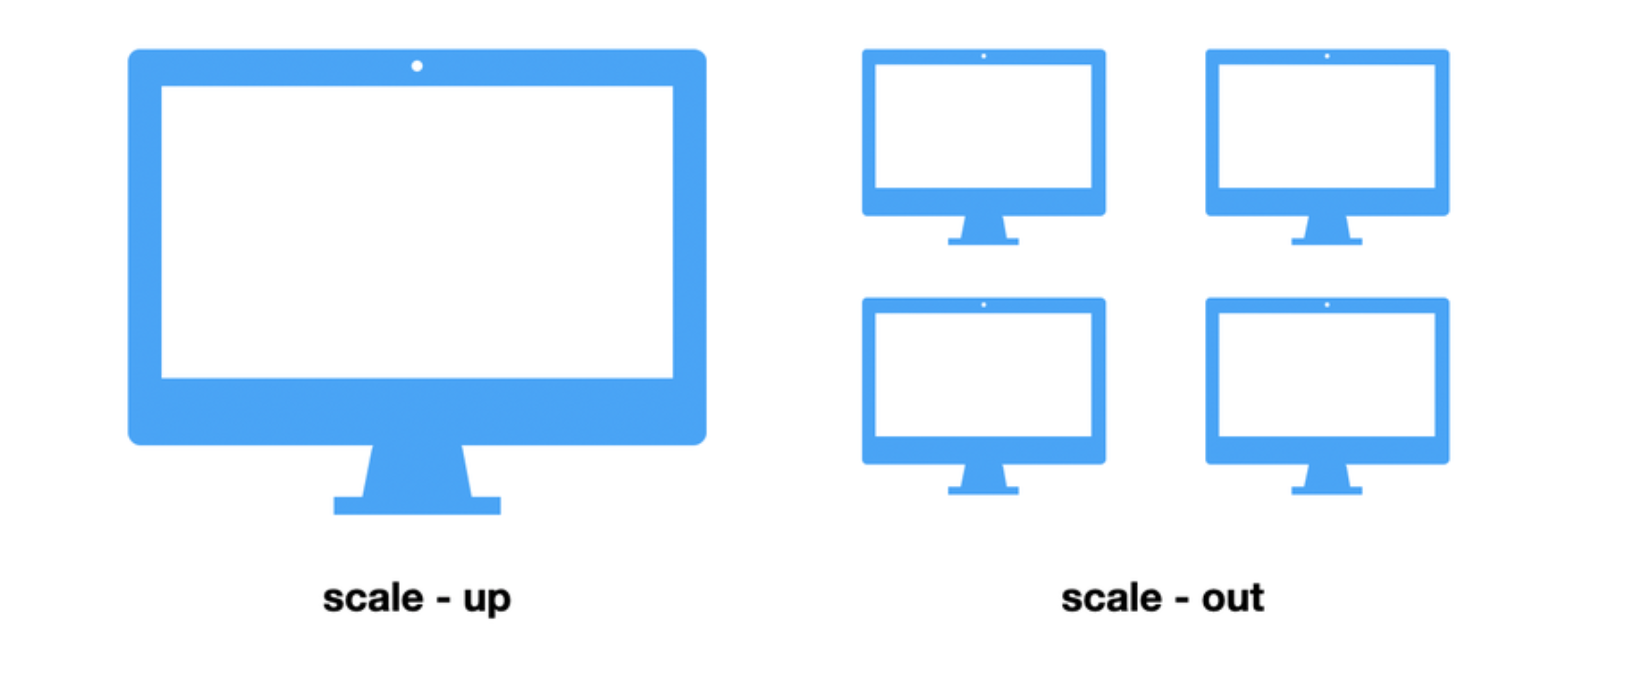

> 용어들이 정리가 되시나요?
> 
> 멀티 태스킹, 프로그램, 동시성과 병렬성, 동시성에서 나오게 된 개념인 비동기와 동기, 추가로 바운드에 대한 설명을 했습니다. 처음에 멀티 태스킹의 개념을 사람에 비유했다면 이제는 프로그램에서의 용어로 풀어서 설명했습니다.
> 
> 프로세스와 스레드, 프로파일링, 마지막으로 Scale-Up과 Scale-Out이라는 단어들이 나왔습니다.
> 
> 앞으로 직접 구현해 보면서 성능이 어떻게 최적화되는지 위 개념에 대해 천천히 느껴 봅시다.

## 파이썬에서 멀티스레드 사용하기 (1) 스레드 생성

파이썬에서 멀티스레드의 구현은 `threading` 모듈을 이용합니다.

https://docs.python.org/3.7/library/threading.html

### 기본 코드

아래 코드는 음식 배달과 그릇 찾기 2가지 작업을 순차적으로 수행하는 코드입니다.

In [10]:
class Delivery:
	def run(self):
		print("delivery")

class RetriveDish:
	def run(self):
		print("Retriving Dish")

work1 = Delivery()
work2 = RetriveDish()

def main():
	work1.run()
	work2.run()

if __name__ == '__main__':
    main()

delivery
Retriving Dish


### 멀티스레드

다음과 같이 코드를 고쳐봅시다.

- threading 모듈을 import하고
- 클래스에 Thread를 상속받습니다.

In [11]:
from threading import *

class Delivery(Thread):
	def run(self):
		print("delivery")

class RetriveDish(Thread):
	def run(self):
		print("Retriving Dish")

work1 = Delivery()
work2 = RetriveDish()

def main():
	work1.run()
	work2.run()

if __name__ == '__main__':
    main()

delivery
Retriving Dish


In [13]:
dir(Thread)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bootstrap',
 '_bootstrap_inner',
 '_delete',
 '_exc_info',
 '_initialized',
 '_reset_internal_locks',
 '_set_ident',
 '_set_tstate_lock',
 '_stop',
 '_wait_for_tstate_lock',
 'daemon',
 'getName',
 'ident',
 'isAlive',
 'isDaemon',
 'is_alive',
 'join',
 'name',
 'run',
 'setDaemon',
 'setName',
 'start']

### 스레드 생성 확인

함수 이름을 출력하면 함수 객체를 확인할 수 있습니다.

In [14]:
from threading import *

class Delivery:
    def run(self):
        print("delivering")

work1 = Delivery()
print(work1.run)

class Delivery(Thread):
    def run(self):
        print("delivering")

work2 = Delivery()
print(work2.run)

<bound method Delivery.run of <__main__.Delivery object at 0x7f5264389710>>
<bound method Delivery.run of <Delivery(Thread-8, initial)>>


위 코드를 실행해 확인해 보면, `work2` 는 다른 스레드(Thread-12, 컴퓨터마다 다릅니다)에 할당되었습니다.

In [18]:
work2.run()

delivering


In [19]:
work2.run

<bound method Delivery.run of <Delivery(Thread-8, initial)>>

In [20]:
work2

<Delivery(Thread-8, initial)>

In [21]:
work1

In [22]:
work1.run

<bound method Delivery.run of <__main__.Delivery object at 0x7f5264389710>>

In [23]:
work1.run()

delivering


## 파이썬에서 멀티스레드 사용하기 (2) 스레드 생성 및 사용

### 스레드 생성

`threading` 모듈의 `Thread` 클래스를 상속받아서 구현할 수도 있지만 그대로 인스턴스화하여 스레드를 생성할 수도 있습니다.

인스턴스화 하려면 Thread 클래스에 인자로 `target`과 `args` 값을 넣어 줍니다. `args`에 넣어 준 파라미터는 스레드 함수의 인자로 넘어갑니다.

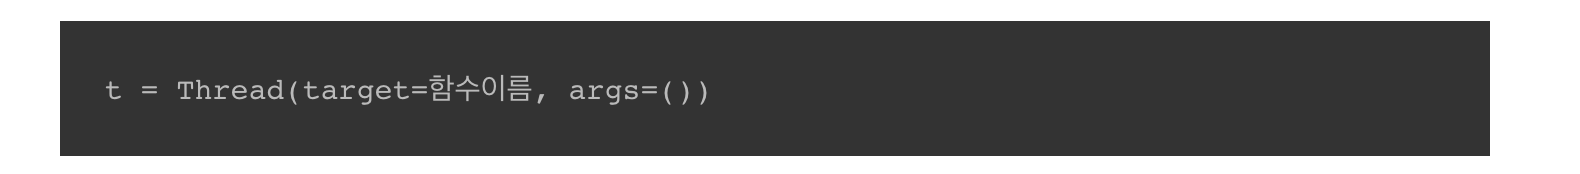

Thread 클래스에는 `start()`, `join()` 같은 스레드 동작 관련 메소드가 있습니다. Thread로 실행할 함수를 정의한 후 start() 를 통해 스레드를 실행합니다.

- (주의) 이 예제에서 while 문의 실행 결과를 제대로 보려면 별도의 jupyter notebook 화면에서 실행하기를 권합니다.

In [24]:
from threading import *
from time import sleep

Stopped = False

def worker(work, sleep_sec):    # 일꾼 스레드입니다.
    while not Stopped:          # 그만 하라고 할때까지
        print('do ', work)      # 시키는 일을 하고
        sleep(sleep_sec)        # 잠깐 쉽니다.
    print('retired..')          # 언젠가 이 굴레를 벗어나면, 은퇴할 때가 오겠지요?
        
t = Thread(target=worker, args=('Overwork', 3))    # 일꾼 스레드를 하나 생성합니다. 열심히 일하고 3초간 쉽니다.
t.start()    # 일꾼, 이제 일을 해야지? 😈

do  Overwork
do  Overwork
do  Overwork
do  Overwork
do  Overwork
do  Overwork


이 일꾼의 일을 어떻게 멈춰주면 좋을까요? `t.terminate()` 같은 메소드가 있느냐 하면, 없습니다.
그래서 스레드 함수가 루프를 돌 때는 꼭 멈춰야 할지를 체크하는 flag(여기서는 Stopped)를 체크하도록 설계해야 합니다.

In [25]:
# 이 코드 블럭을 실행하기 전까지는 일꾼 스레드는 종료하지 않습니다. 
Stopped = True    # 일꾼 일 그만하라고 세팅해 줍시다. 
t.join()          # 일꾼 스레드가 종료할때까지 기다립니다. 
print('worker is gone.')

retired..
worker is gone.


----
----
----
----

In [29]:
ttt = Thread(target=worker, args=('work hard!', 0.5))

In [30]:
Stopped = False
ttt.start()

do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!
do  work hard!


In [31]:
Stopped = True    # 일꾼 일 그만하라고 세팅해 줍시다. 
ttt.join()          # 일꾼 스레드가 종료할때까지 기다립니다. 
print('worker is gone.')

retired..
worker is gone.


----
----
----
----

## 파이썬에서 멀티프로세스 사용하기

파이썬에서 멀티프로세스의 구현은 `multiprocessing` 모듈을 이용해서 할 수 있습니다.

https://docs.python.org/3.7/library/multiprocessing.html

### 프로세스 생성

프로세스 또한 스레드와 유사한 방법으로 생성합니다.

`Process` 인스턴스를 만든 뒤, `target` 과 `args` 파라미터에 각각 함수 이름과 함수 인자를 전달합니다.

In [32]:
import multiprocessing as mp

def delivery():
    print('delivering...')

p = mp.Process(target=delivery, args=())
p.start()

delivering...


### 프로세스 사용

`Process` 클래스는 `start()`, `join()`, `terminate()` 같은 프로세스 동작 관련 메소드가 있습니다.

In [33]:
p = mp.Process(target=delivery, args=())
p.start() # 프로세스 시작
p.join() # 실제 종료까지 기다림 (필요시에만 사용)
p.terminate() # 프로세스 종료

delivering...


In [34]:
p.terminate()

## 파이썬에서 스레드/프로세스 풀 사용하기

지금까지 스레드와 프로세스를 생성하는 방법을 배웠습니다. 사실 멀티스레드/프로세스 작업을 할 때 가장 많은 연산이 필요한 작업은 스레드나 프로세스를 생성하고 종료하는 일입니다. 특히 스레드/프로세스를 사용한 뒤에는 제대로 종료해 주어야 컴퓨팅 리소스가 낭비되지 않습니다.

또 지금까지 본 것처럼 하나씩 하나씩 실행한다고 전체적인 프로그램의 성능이 좋아지지는 않아요. 오히려 더 번거로울 수 있습니다. 그래서 실제로 사용할 때에는 스레드/프로세스 풀을 사용해서 생성합니다.

"풀(Pool)"은 스레드나 프로세스들로 가득 찬 풀장이라고 생각하면 됩니다. 스레드 풀을 만들면 각각의 태스크들에 대해 자동으로 스레드들을 할당하고 종료합니다.

풀을 만드는 방법은 크게 2가지가 있습니다.

Queue(https://docs.python.org/3.7/library/queue.html)를 사용해서 직접 만드는 방법

concurrent.futures(https://docs.python.org/ko/3.7/library/concurrent.futures.html) 라이브러리의 ThreadPoolExecutor , ProcessPoolExecutor클래스를 이용하는 방법

2가지 방법은 모두 많이 사용됩니다. 아직 자료구조에 대해 배우지 않았으니 여기서는 `concurrent.futures` 모듈을 사용하는 방법만을 이용해 구현해 보겠습니다.

### `concurrent.futures` 모듈 소개

이 모듈은 파이썬 3.2부터 추가된 모듈입니다. Java 언어를 배운 적이 있다면 ThreadPoolExecutor 에 대해 들어본 적이 있을 거예요. 이를 파이썬에서 구현한 형태라고 생각하시면 편합니다. 한국말로 "동시성 퓨처"라고 번역해서 부르기도 하는데, 기능은 크게 4가지가 있습니다.

- Executor 객체
- ThreadPoolExecutor 객체
- ProcessPoolExecutor 객체
- Future 객체

여기서는 Thread/Process Pool 구현에 필요한 부분만 살펴보겠습니다.



### `ThreadPoolExecutor`

`Executor` 객체를 이용하면 스레드 생성, 시작, 조인 같은 작업을 할 때, `with` 컨텍스트 관리자와 같은 방법으로 가독성 높은 코드를 구현할 수 있습니다. (프로세스 구현 방법 역시 동일하므로 설명은 스레드로만 하겠습니다.)

```python
with ThreadPoolExecutor() as executor:
    future = executor.submit(함수이름, 인자)
```


앞서 한 `Delivery` 클래스를 예시로 들면 다음과 같습니다.

In [35]:
from concurrent.futures import ThreadPoolExecutor

class Delivery:
    def run(self):
        print("delivering")
w = Delivery()

with ThreadPoolExecutor() as executor:
    future = executor.submit(w.run)

delivering


### `multiprocessing.Pool`

multiprocessing.Pool.map을 통해 여러 개의 프로세스에 특정 함수를 매핑해서 병렬처리하도록 구현하는 방법이 널리 사용됩니다.

In [36]:
from multiprocessing import Pool
from os import getpid

def double(i):
    print("I'm processing ", getpid())    # pool 안에서 이 메소드가 실행될 때 pid를 확인해 봅시다.
    return i * 2

with Pool() as pool:
      result = pool.map(double, [1, 2, 3, 4, 5])
      print(result)

I'm processing I'm processing I'm processing I'm processing I'm processing    119120122


  123121

[2, 4, 6, 8, 10]


위에서 `double(i)`이라는 메소드가 pool을 통해 각각 다른 pid를 가진 프로세스들 위에서 multiprocess로 실행되었다는 것을 확인할 수 있습니다.

프로그래밍이 처음이신 분에게는 조금 낯선 개념일 수도 있습니다. 다음 스텝에서 실제 프로젝트로 구현해볼 예정이니 그때 조금 더 이해할 수 있을 거예요.

## 실전 예제 (1) futures 모듈

이번 시간에는 `concurrent.futures` 모듈의 `ProcessPoolExecutor` 를 이용해 병렬 프로그래밍을 연습해 보도록 하겠습니다.

## 실전 예제 (2) 튜토리얼

이번 예제에서 다루는 부분은 아래 2개입니다.

- Executor 객체의 map() 함수
- ProcessPoolExecutor 부분
우리는 `concurrent.futures` 모듈의 `ProcessPoolExecutor`를 이용해서 멀티프로세스를 구현을 연습해 보겠습니다.

아래 코드는 concurrent.futures 모듈 공식 문서의 ProcessPoolExecutor 예제 에 실린 코드입니다. 아래부터는 다시 주피터 커널을 사용하셔도 좋고, 파일에 복사하셔서 사용하셔도 좋습니다.

--------

```python
import math
import concurrent

PRIMES = [
    112272535095293,
    112582705942171,
    112272535095293,
    115280095190773,
    115797848077099,
    1099726899285419]

def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True

def main():
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))

if __name__ == '__main__':
    main()
```

---------
위 코드를 하나씩 뜯어봅시다.

### 1) 문제

소수(prime) 판별 문제로 PRIMES 변수에 선언된 숫자들이 소수인지 아닌지를 판별합니다.

In [37]:
import math
import concurrent

PRIMES = [
    112272535095293,
    112582705942171,
    112272535095293,
    115280095190773,
    115797848077099,
    1099726899285419]

print("*    .\n·   *\n  *   *\n🌲 🦕 🌳")

*    .
·   *
  *   *
🌲 🦕 🌳


### 소수판별 함수 `is_prime`

소수를 판별하는 로직을 함수로 구현했습니다. 소수, math 라이브러리개념은 링크를 참조해 주세요.  
if 문을 통하여 0,1,2에 관련하여 소수를 판별하고 3이후의 숫자는 math 라이브러리를 활용하여 소수 판별을 진행합니다.

In [38]:
def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True
print("🌲      🦕...")

🌲      🦕...


------
------
------
------
> 윗 함수의 논리로 치자면,
> - 1) 2로 나뉘는 건 `False`
> - 2) 그래서 3 이상 수에서 홀수만 볼텐데
> - 그게 3부터의 숫자 중 뭐라도 나누어 떨어지면 `False`

In [39]:
import math

In [54]:
math.sqrt(7)

2.6457513110645907

In [55]:
math.floor(math.sqrt(7))

2

In [40]:
math.sqrt(3)

1.7320508075688772

In [41]:
math.floor(math.sqrt(3))

1

In [44]:
range(3, 1 + 1, 2)

range(3, 2, 2)

In [45]:
[i for i in range(3, 1 + 1, 2)]

[]

In [46]:
for i in range(3, 1 + 1, 2):
    print(i)

In [50]:
math.sqrt(4)

2.0

In [51]:
[i for i in range(3, 3, 2)]

[]

In [53]:
for i in range(3, 2 + 1, 2):
        if n % i == 0:
            print(False)

-----
-----
-----
-----

### 3) 소수 판별 함수 호출

`main()` 함수를 따로 작성하여 소수 판별 함수`(is_prime)`를 호출하였습니다.

맵-리듀스(map-reduce)스타일로 코드를 작성하고 `map()` 함수를 `ProcessPoolExecutor()` 인스턴스에서 생성된 `executor` 에서 실행시킵니다.

`concurrent.futures` 라이브러리의 프로세스 풀에서 동작하게 하기 위해 `with` 문을 써서 구현했습니다.

In [56]:
def main():
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))
print("🌲   🦕.....")

🌲   🦕.....


In [63]:
with concurrent.futures.ProcessPoolExecutor() as executor:
    print(executor.map(is_prime, PRIMES))

<generator object _chain_from_iterable_of_lists at 0x7f52642fb450>


In [62]:
executor

In [65]:
with concurrent.futures.ProcessPoolExecutor() as exe:
    for i in exe.map(is_prime, PRIMES):
        print(i)

True
True
True
True
True
False


병렬처리와 단일처리의 비교를 위해 코드를 아래와 같이 수정해 볼게요.

- 프로파일링을 위한 시간 계산 코드를 추가
- 단일처리로 수행했을 때의 코드를 추가, 단일처리 프로파일링을 위한 시간 계산 코드를 추가

In [57]:
import time

def main():
    print("병렬처리 시작")
    start = time.time()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))
    end = time.time()
    print("병렬처리 수행 시각", end-start, 's')
    
    print("단일처리 시작")
    start = time.time()
    for number, prime in zip(PRIMES, map(is_prime, PRIMES)):
        print('%d is prime: %s' % (number, prime))
    end = time.time()
    print("단일처리 수행 시각", end-start, 's')
print(" ❣\n🌲🦕.......")

 ❣
🌲🦕.......


### ### 4) 전체 코드


In [66]:
main()

병렬처리 시작
112272535095293 is prime: True
112582705942171 is prime: True
112272535095293 is prime: True
115280095190773 is prime: True
115797848077099 is prime: True
1099726899285419 is prime: False
병렬처리 수행 시각 0.7370085716247559 s
단일처리 시작
112272535095293 is prime: True
112582705942171 is prime: True
112272535095293 is prime: True
115280095190773 is prime: True
115797848077099 is prime: True
1099726899285419 is prime: False
단일처리 수행 시각 2.825228452682495 s


아래는 제 PC에서 실행해본 결과입니다.
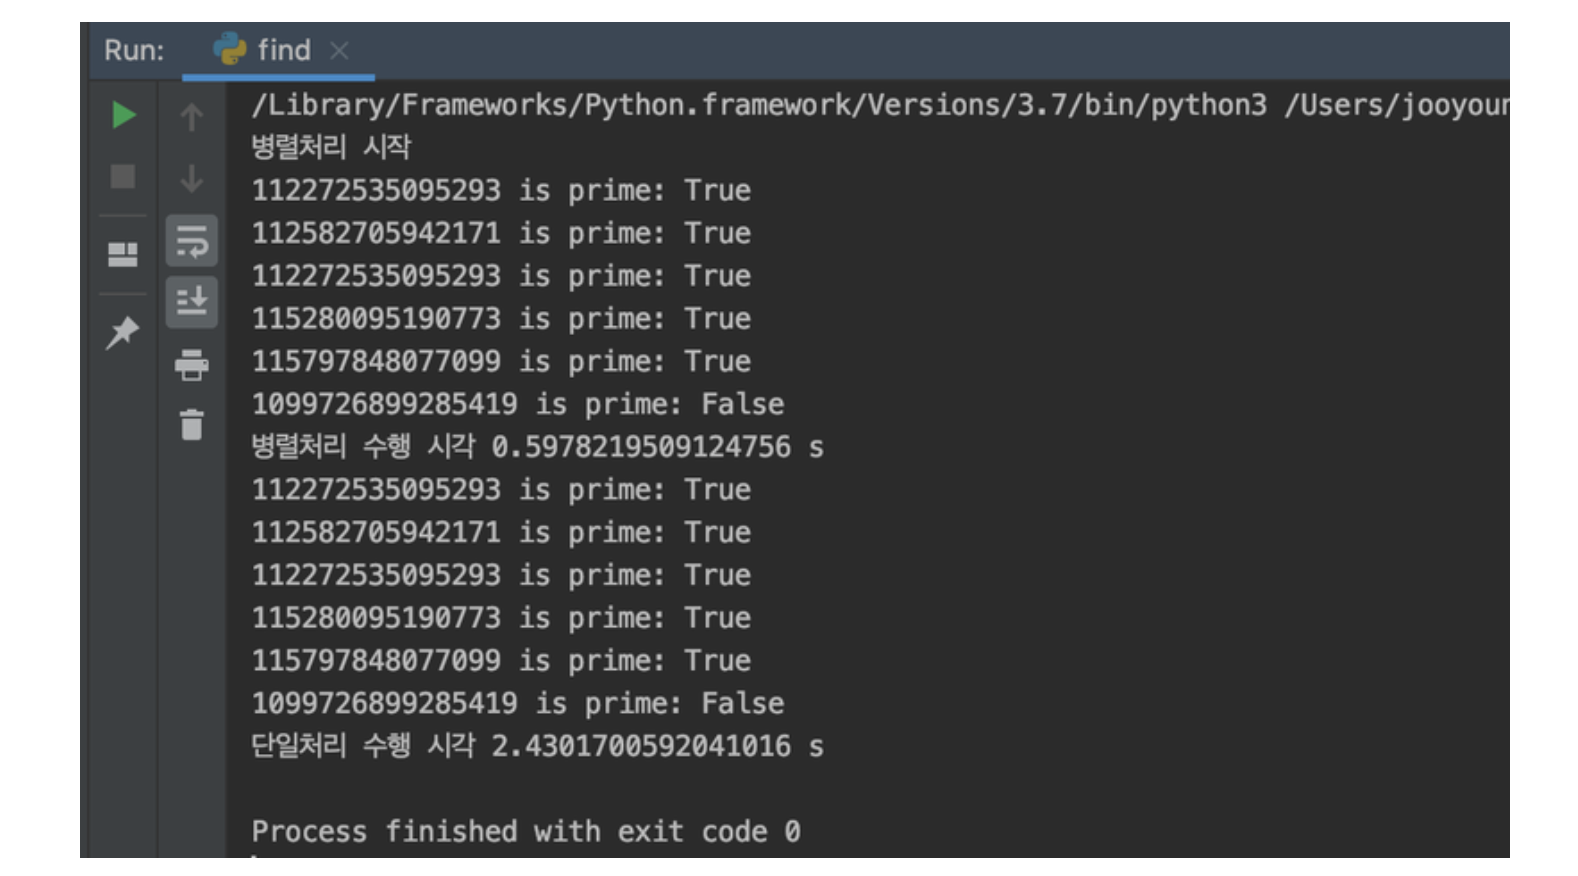

수행 시간은 PC 성능에 따라 다르지만, 2.6GHz 6코어를 사용하는 CPU에서 돌린 결과, 병렬로 처리하면 약 0.6초 걸리고, 단일처리하면 2.43초가 걸렸습니다.

여러분의 LMS 환경에서는 어떤가요?